In [1]:
import json
import requests
import pandas as pd
import seaborn as sns
import pytz

from matplotlib import pyplot as plt
from datetime import datetime, timedelta, date, time
from snscrape.modules.twitter import TwitterSearchScraper as tss

In [2]:
def get_tweets(tag, limit=10000):
    ti = time()
    search = tss(query=f"{tag} lang:pt")
    results = []
    for i, result in enumerate(search.get_items(), start=1):
        if i > limit:
            return results
        results.append(json.loads(result.json()))
    tf = time()
    print(f"Tempo de execução: {tf - ti}")
    

In [3]:
json_teste = get_tweets("copa")

In [4]:
data = {
        'username': [],
        'original': [],
        'verified': [],
        'tweet_date': [],
        }

In [5]:
for n in json_teste:
    #preprocessed_tweet = [stemmer.stem(str(palavra)) for palavra in n['content'].split(' ') if palavra]
    data['original'].append(n['content'])    
    #data['tweet'].append(' '.join(preprocessed_tweet))
    data['verified'].append(n['user']['verified'])  
    data['username'].append(n['user']['username'])  
    data['tweet_date'].append(n['date'])

In [6]:
df_hour = pd.DataFrame(data)

In [7]:
display(df_hour)

,username,original,verified,tweet_date
0,marcwlla0,"po brincadeira ein, perder a abertura da copa ...",False,2022-11-20T12:32:24+00:00
1,pyettrasoliv,só de saber que a copa já começa hoje minha vi...,False,2022-11-20T12:32:24+00:00
2,Biasilva_09,queria vê a abertura da copa mas tô tão cansad...,False,2022-11-20T12:32:23+00:00
3,jkznervlez,"Dreamers saiu as duas da manhã de hoje, tá cir...",False,2022-11-20T12:32:23+00:00
4,KevinVeiga,@Pedro9oficial Vai fazer 7 gols na copa brabo!...,False,2022-11-20T12:32:23+00:00
...,...,...,...,...
9995,YasminRissi_,"Só queria assistir a abertura da copa, realida...",False,2022-11-20T11:30:59+00:00
9996,soulvmis,todo mundo amando a música e dizendo que eh a ...,False,2022-11-20T11:30:58+00:00
9997,sunkidea,vou assistir a copa hj pelo jk 🫶🏻🫶🏻,False,2022-11-20T11:30:58+00:00
9998,f_delaurentiis,Começou Copa https://t.co/sxBEzUD0UY,True,2022-11-20T11:30:58+00:00


In [8]:
df_hour.dtypes

username      object
original      object
verified        bool
tweet_date    object
dtype: object

In [9]:
df_hour['tweet_date'] = pd.to_datetime(df_hour['tweet_date'])
df_hour['tweet_date'] = df_hour.tweet_date.dt.tz_convert('Brazil/East')

In [10]:
df_hour.dtypes

username                           object
original                           object
verified                             bool
tweet_date    datetime64[ns, Brazil/East]
dtype: object

In [11]:
df_hour['tweet_hour'] = df_hour['tweet_date'].dt.hour
df_hour['tweet_day'] = df_hour['tweet_date'].dt.date

In [12]:
display(df_hour)

,username,original,verified,tweet_date,tweet_hour,tweet_day
0,marcwlla0,"po brincadeira ein, perder a abertura da copa ...",False,2022-11-20 09:32:24-03:00,9,2022-11-20
1,pyettrasoliv,só de saber que a copa já começa hoje minha vi...,False,2022-11-20 09:32:24-03:00,9,2022-11-20
2,Biasilva_09,queria vê a abertura da copa mas tô tão cansad...,False,2022-11-20 09:32:23-03:00,9,2022-11-20
3,jkznervlez,"Dreamers saiu as duas da manhã de hoje, tá cir...",False,2022-11-20 09:32:23-03:00,9,2022-11-20
4,KevinVeiga,@Pedro9oficial Vai fazer 7 gols na copa brabo!...,False,2022-11-20 09:32:23-03:00,9,2022-11-20
...,...,...,...,...,...,...
9995,YasminRissi_,"Só queria assistir a abertura da copa, realida...",False,2022-11-20 08:30:59-03:00,8,2022-11-20
9996,soulvmis,todo mundo amando a música e dizendo que eh a ...,False,2022-11-20 08:30:58-03:00,8,2022-11-20
9997,sunkidea,vou assistir a copa hj pelo jk 🫶🏻🫶🏻,False,2022-11-20 08:30:58-03:00,8,2022-11-20
9998,f_delaurentiis,Começou Copa https://t.co/sxBEzUD0UY,True,2022-11-20 08:30:58-03:00,8,2022-11-20


In [13]:
df_hour.dtypes

username                           object
original                           object
verified                             bool
tweet_date    datetime64[ns, Brazil/East]
tweet_hour                          int64
tweet_day                          object
dtype: object

In [ ]:
'''
def temp_plot():
    chart_data = pd.DataFrame(px.data.gapminder())
    clist = chart_data["sentimento"].unique().tolist()
    sentiment = st.multiselect("Select", clist)
    st.header("You selected: {}".format(", ".join(sentiment)))
    dfs = {sentimento: df[df["sentimento"] == sentimento] for sentimento in sentiment}
    fig = go.Figure()
    for sentimento, chart_data in dfs.items():
        fig = fig.add_trace(go.Scatter(x=df["hour"], y=df["gdpPercap"], name=sentimento))
    st.plotly_chart(fig)

temp_plot()'''

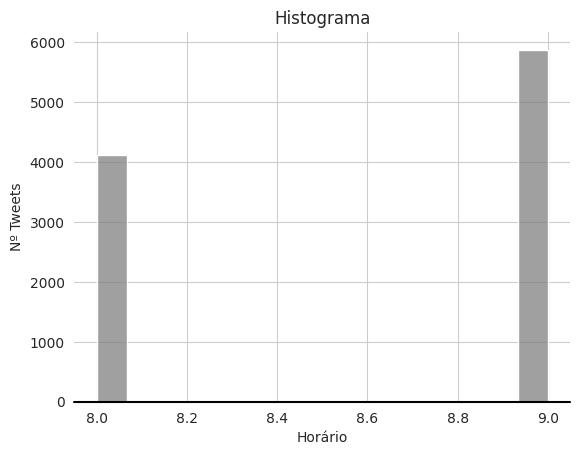

In [17]:
# histograma 

sns.set_style("whitegrid")

ax = sns.histplot(data=df_hour, x='tweet_hour', color = 'grey')
plt.ylabel('Nº Tweets')
plt.xlabel('Horário')
plt.title('Histograma')


ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

In [ ]:
'''
db = db.sort_values(by='period')
sns.set_style('whitegrid')
axis = sns.histplot(data=db, x= 'period')
axis.set(frame_on=False)
axis.axhline(0, color='k', clip_on=False)
plt.xlabel('Period of the day')
plt.ylabel('Number of tweets')
plt.title('Tweets per period of the day')
plt.show()
'''

In [ ]:
'''
sns.set_style('whitegrid')
axis = sns.countplot(data=db, y='period', hue='sentiment', order = lista_ord)
                   
axis.set(frame_on=False)
axis.axvline(0, color='k', clip_on=False)
plt.ylabel('Period')
plt.xlabel('Number of tweets')
plt.title('Tweets per period of the day according to sentiment')
plt.legend(fontsize='9.5')
plt.show()
'''